In [1]:
import os 
import pandas as pd 
import numpy as np 

In [2]:
#reading and filtering out the data
csv_file="raw_Mar31.csv"
raw_rp_data=pd.read_csv(csv_file,index_col=None)

print(raw_rp_data.shape)
print(raw_rp_data.columns)

#filter only videos and valid RP values
rp_data=raw_rp_data.loc[(raw_rp_data != -1).all(axis=1) & raw_rp_data["Filename"].str.endswith(".mp4")].copy()
rp_data.index = pd.RangeIndex(0, len(rp_data))

(11577, 148)
Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'masculine_faces',
       'feminine_faces', 'video_key_to_match', 'brand_category'],
      dtype='object', length=148)


0.00000000000e+00
Average screentimes: 0.7519333886514175 0.24806661134858254
Median screentimes: 0.9579509415958014 0.04204905840419859


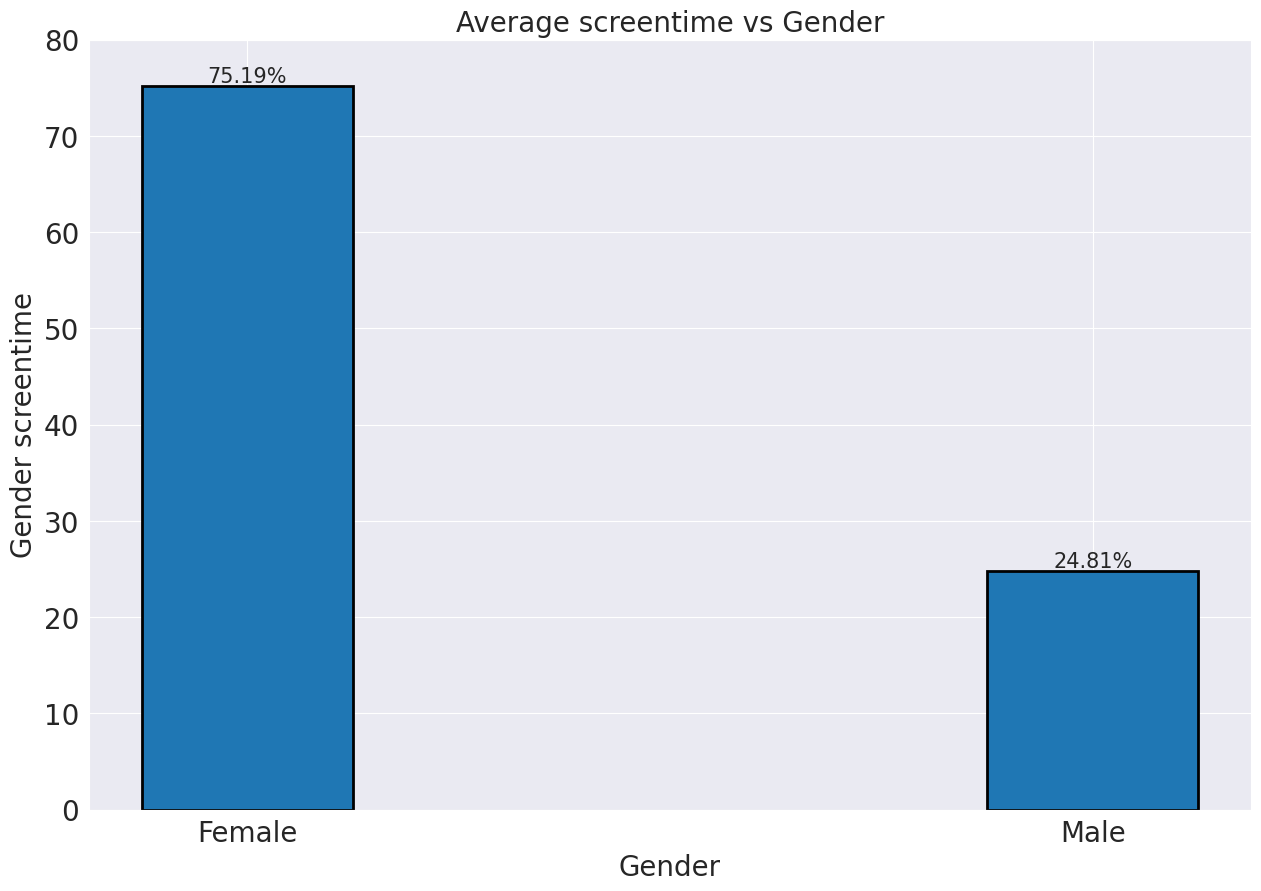

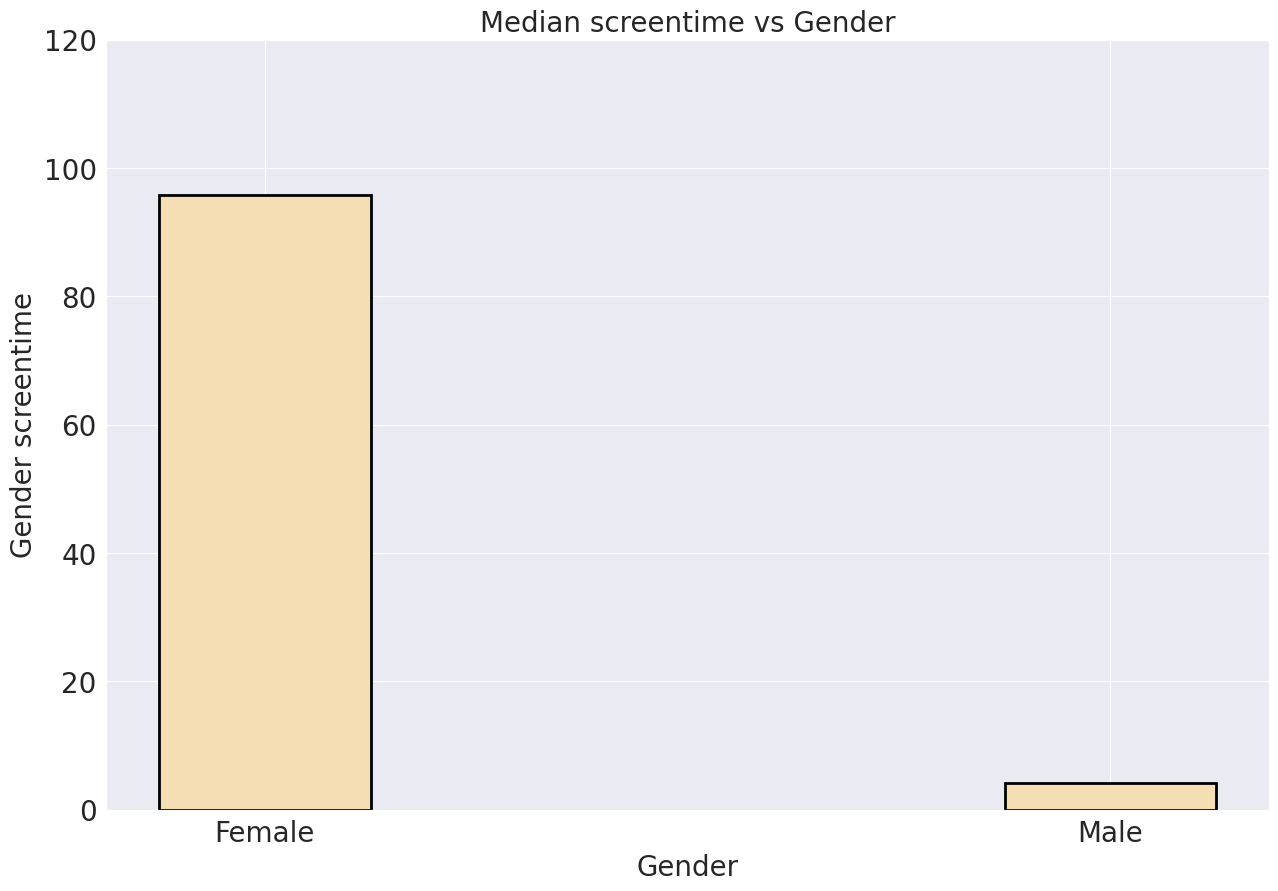

In [3]:
#compute female screentime and male screentime and plot the average and median
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
from scipy.stats import ttest_ind

plt.rcParams["figure.figsize"] = (15,10)

rp_data['female_screentime']=rp_data['feminine_faces']/(rp_data['masculine_faces']+rp_data['feminine_faces'])
rp_data['male_screentime']=rp_data['masculine_faces']/(rp_data['masculine_faces']+rp_data['feminine_faces'])

t, p = ttest_ind(list(rp_data['female_screentime']), list(rp_data['male_screentime']))
print(f"{p:.11e}")


#plot the average male and female screentime
average_female_screentime=rp_data['female_screentime'].mean()
average_male_screentime=rp_data['male_screentime'].mean()

median_female_screentime=rp_data['female_screentime'].median()
median_male_screentime=rp_data['male_screentime'].median()

print('Average screentimes:',average_female_screentime,average_male_screentime)
print('Median screentimes:',median_female_screentime,median_male_screentime)

####################################plot the average male vs female screentime#######################################
# create a figure and axis object
fig, ax = plt.subplots()

keys=['Female','Male']
# create a bar plot of the dictionary
mean_screentime_gender=[average_female_screentime*100,average_male_screentime*100]
ax.bar(keys,mean_screentime_gender,
       edgecolor='black',linewidth=2,width=0.25)
for i, v in enumerate(mean_screentime_gender):
    ax.annotate(str(round((v/sum(mean_screentime_gender))*100, 2)) + "%", xy=(i, v), ha='center', va='bottom', fontsize=15)

# set the title and axis labels
ax.set_title('Average screentime vs Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Gender screentime', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

#plt.show()
#save the plots
plt.savefig('plots/average_gender_screentime.png',dpi=300)


########################################### plot the median male vs female screentime ########################################
# create a figure and axis object
fig, ax = plt.subplots()

keys=['Female','Male']
# create a bar plot of the dictionary
ax.bar(keys,[median_female_screentime*100,median_male_screentime*100],
           edgecolor='black',
           linewidth=2, color='#F5DEB3', width=0.25)

# set the title and axis labels
ax.set_title('Median screentime vs Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Gender screentime', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

#plt.show()
plt.savefig('plots/median_gender_screentime.png',dpi=300)

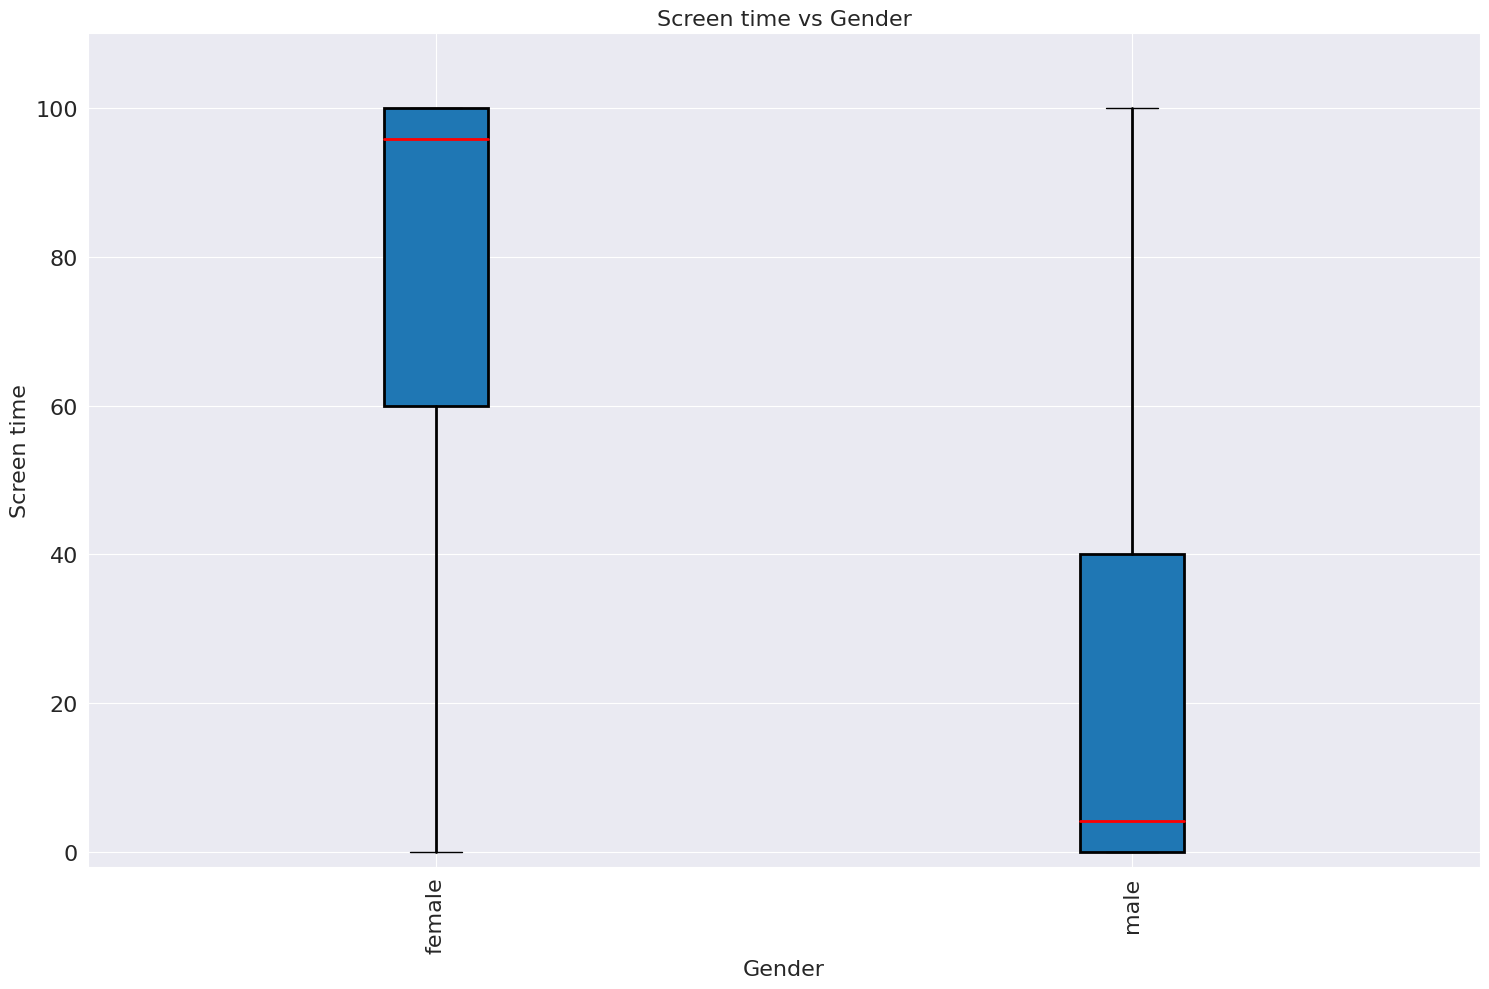

In [4]:
# create a figure and axis object
fig, ax = plt.subplots()

fm_sc_time=[x*100 for x in list(rp_data['female_screentime'])]
m_sc_time=[x*100 for x in list(rp_data['male_screentime'])]

# create a boxplot of the data with custom labels
ax.boxplot([fm_sc_time,m_sc_time], labels=['female','male'], 
          patch_artist=True, 
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Screen time vs Gender',fontsize=16)
ax.set_xlabel('Gender',fontsize=16)
ax.set_ylabel('Screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-2,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('plots/box_plot_gender_screentime.png',dpi=300)

In [30]:
def quartiles(data, *args, **kwargs):
    """Function to compute and annotate quartiles"""
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    plt.annotate(f'Q1={q1:.2f}', xy=(0.25, q1), xytext=(-25, 0), textcoords='offset points', ha='right', va='center', **kwargs)
    plt.annotate(f'Q2={q2:.2f}', xy=(0.50, q2), xytext=(-25, 0), textcoords='offset points', ha='right', va='center', **kwargs)
    plt.annotate(f'Q3={q3:.2f}', xy=(0.75, q3), xytext=(-25, 0), textcoords='offset points', ha='right', va='center', **kwargs)

data = [1, 2, 3, 4, 5]

60.0 100.0
0.0 40.0


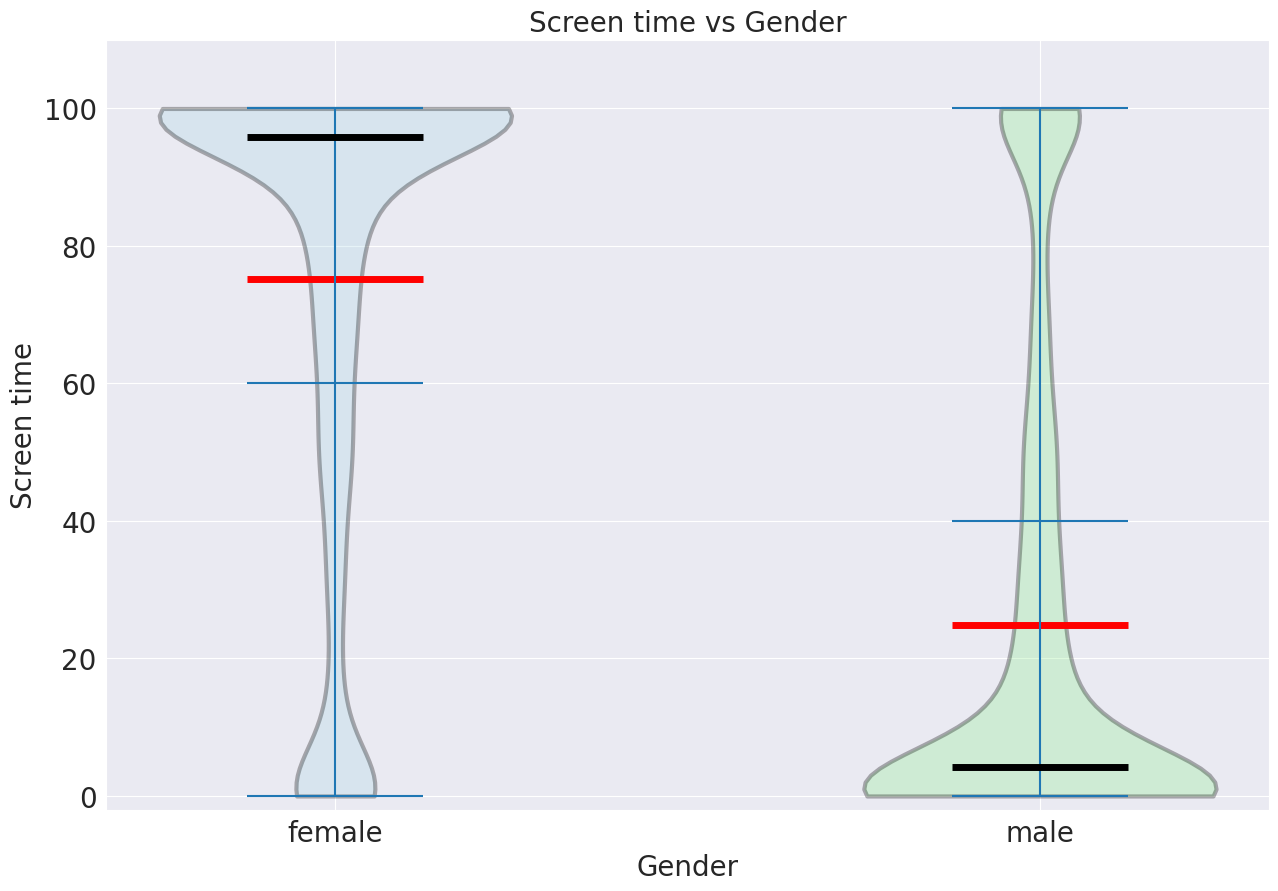

In [59]:
fig, ax = plt.subplots()
labels=['female','male']
fm_sc_time=[x*100 for x in list(rp_data['female_screentime'])]
m_sc_time=[x*100 for x in list(rp_data['male_screentime'])]
colors = ['lightblue', 'lightgreen']
median_colors=['black','black']
mean_colors=['red','red']
# create a boxplot of the data with custom labels
plots=ax.violinplot([fm_sc_time,m_sc_time],showmedians=True,showmeans=True,quantiles=[[0.25,0.75],[0.25,0.75]])
plt.xticks(range(1, len(labels) + 1), labels, fontsize=16)

print(np.percentile(fm_sc_time,25),np.percentile(fm_sc_time,75))
print(np.percentile(m_sc_time,25),np.percentile(m_sc_time,75))

# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('#000000')
    pc.set_linewidth(3)

plots['cmedians'].set_colors(median_colors)
plots['cmedians'].set_linewidth(5)
plots['cmeans'].set_colors(mean_colors)
plots['cmeans'].set_linewidth(5)

# # calculate the quartile values for each list in the data
# quartiles = []
# for d in [fm_sc_time,m_sc_time]:
#     q1, q2, q3 = np.percentile(d, [25,50, 75])
#     quartiles.append((q1,q3))

# # annotate the plot with the quartile values
# for i, (q1, q3) in enumerate(quartiles):
#     ax.text(i+1.05, q1+2, f'Q1={q1:.2f}', ha='center', va='center',fontsize=20)
#     ax.text(i+1.05, q3+2, f'Q3={q3:.2f}', ha='center', va='center', fontsize=20)
    
# set the title and axis labels
ax.set_title('Screen time vs Gender',fontsize=20)
ax.set_xlabel('Gender',fontsize=20)
ax.set_ylabel('Screen time', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylim(-2,110)
plt.savefig('plots/violin_plot_gender_screentime.png',dpi=300)

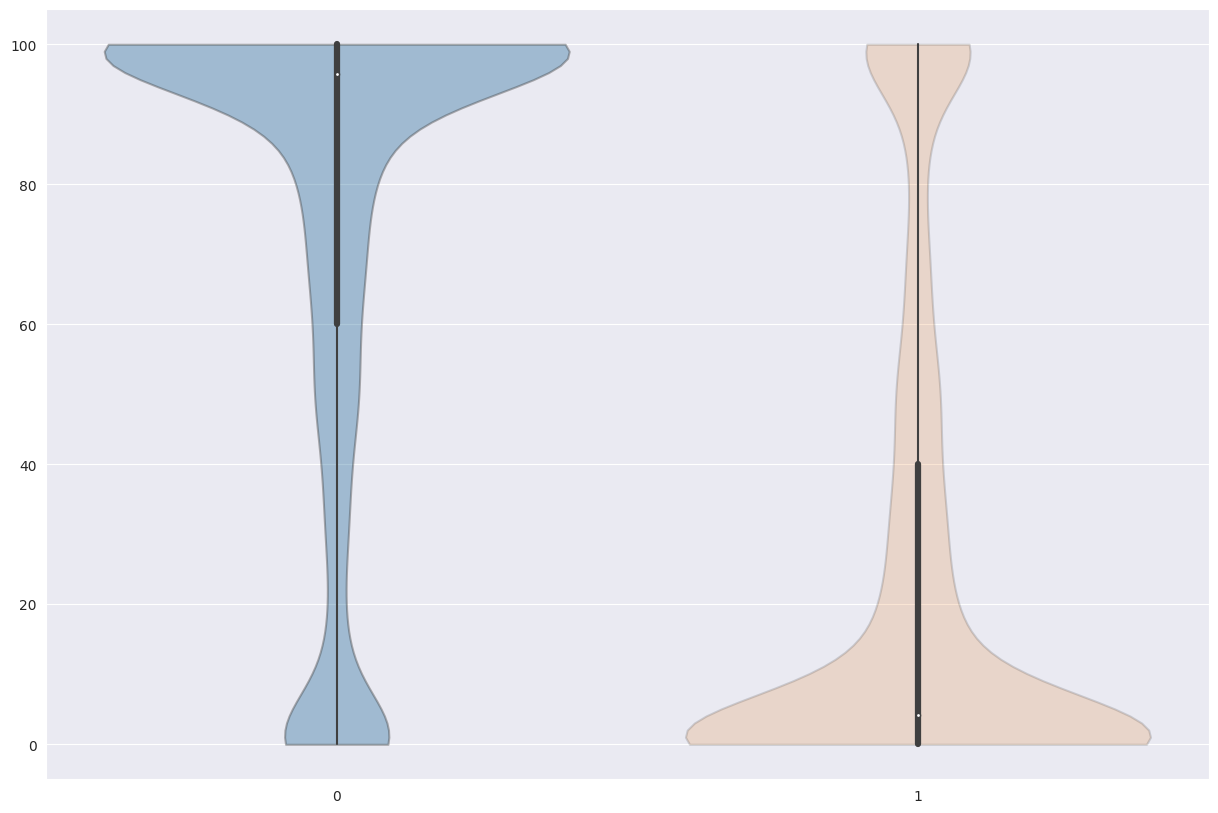

In [19]:
#plot histogram 
fig, ax = plt.subplots()
plots=sns.violinplot([fm_sc_time,m_sc_time],alpha=0.25,cut=0,showmedians=True,medianprops={'color':'red','linewidth':3})
for violin, alpha in zip(plots.collections[::2], [0.4,0.2]):
    violin.set_alpha(alpha)

In [6]:
rp_data[['female_screentime','male_screentime','feminine_faces','masculine_faces']]

,female_screentime,male_screentime,feminine_faces,masculine_faces
0,0.852234,0.147766,248,43
1,0.088020,0.911980,36,373
2,0.004673,0.995327,1,213
3,0.909677,0.090323,423,42
4,0.984615,0.015385,448,7
...,...,...,...,...
7643,0.996032,0.003968,1255,5
7644,0.975758,0.024242,483,12
7645,0.993902,0.006098,163,1
7646,0.695833,0.304167,167,73


In [7]:
0.996032+0.003968

1.0

In [50]:
#age analysis 
def plot_age_screentime(data,keys,metric="median"):
    
    fig, ax = plt.subplots()
    # create a bar plot of the dictionary
    ax.bar(keys,data,edgecolor='black',linewidth=2, width=0.25)
    
    for i, v in enumerate(data):
        ax.annotate(str(round((v/sum(data))*100, 2)) + "%", xy=(i, v), ha='center', va='bottom', fontsize=15)

    # set the title and axis labels
    title=metric+" screentime vs Age"
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Age', fontsize=20)
    ax.set_ylabel('Age screentime', fontsize=20)

    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    #plt.show()
    #save the plots
    filename=metric+"_age_screentime.png"
    plt.savefig('plots/'+filename,dpi=300)
    

'''
age_1: (0,15)
age_2: (15,25)
age_3: (25,35)
age_4: (35,45)
age_5: (45,55)
age_6: (55,65)
age_7: (65,75)

'''

#create age group 8 for combining age_5, age_6, age_7
rp_data['age_8']=rp_data['age_5']+rp_data['age_6']+rp_data['age_7']

#cross check for intersection age bins

dict_age_mapping={'age_1':"0-15",
                 'age_2':"15-25",
                 'age_3': "25-35",
                  'age_4': "35-45",
                  'age_8':"45-75"}

#average age screentime 
rp_data['total_faces']=rp_data['feminine_faces']+rp_data['masculine_faces']

#screentime estimates
mean_age_wise_screentime=[]
median_age_wise_screentime=[]
values=[]
age_screentime_total_list=[]

for key in list(dict_age_mapping.keys()):
    
    rp_data[key+"_screentime"]=(rp_data[key])/(rp_data['total_faces'])
    rp_screentime=list(rp_data[key+"_screentime"])
    rp_screentime=[x*100 for x in rp_screentime]
    print(dict_age_mapping[key], np.percentile(rp_screentime,25))
    print(dict_age_mapping[key], np.percentile(rp_screentime,50))
    print(dict_age_mapping[key], np.percentile(rp_screentime,75))
    age_screentime_total_list.append(rp_screentime)
    
    #     mean_age_wise_screentime.append(rp_data[key+"_screentime"].mean()*100)
    #     median_age_wise_screentime.append(rp_data[key+"_screentime"].median()*100)
    #     values.append(dict_age_mapping[key])

# plot_age_screentime(median_age_wise_screentime,values,metric="median")
# plot_age_screentime(mean_age_wise_screentime,values,metric="Average")

0-15 0.0
0-15 0.0
0-15 1.1717295873573308
15-25 9.090909090909092
15-25 40.55555555555556
15-25 73.48713033953997
25-35 14.701286764705884
25-35 44.927536231884055
25-35 79.46083596768528
35-45 0.0
35-45 0.0
35-45 0.2638113515278619
45-75 0.0
45-75 0.0
45-75 0.0


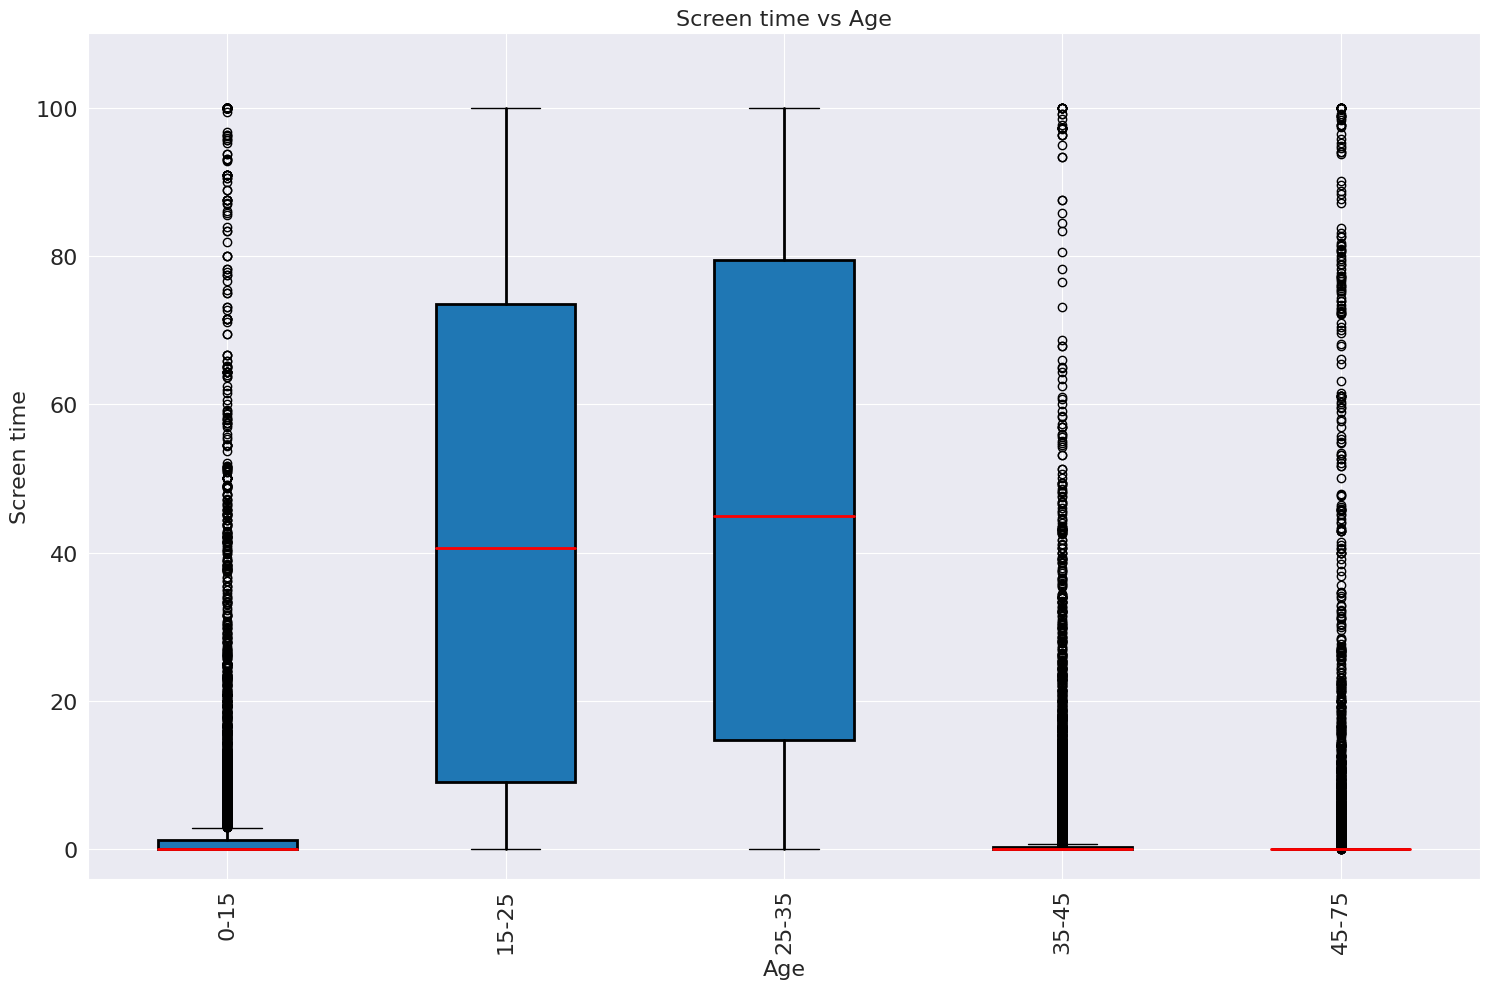

In [9]:
# create a boxplot of the data with custom labels
fig, ax = plt.subplots()

ax.boxplot(age_screentime_total_list, labels=[dict_age_mapping[k] for k in list(dict_age_mapping.keys())], 
          patch_artist=True, 
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Screen time vs Age',fontsize=16)
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('Screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-4,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('plots/box_plot_age_screentime.png',dpi=300)

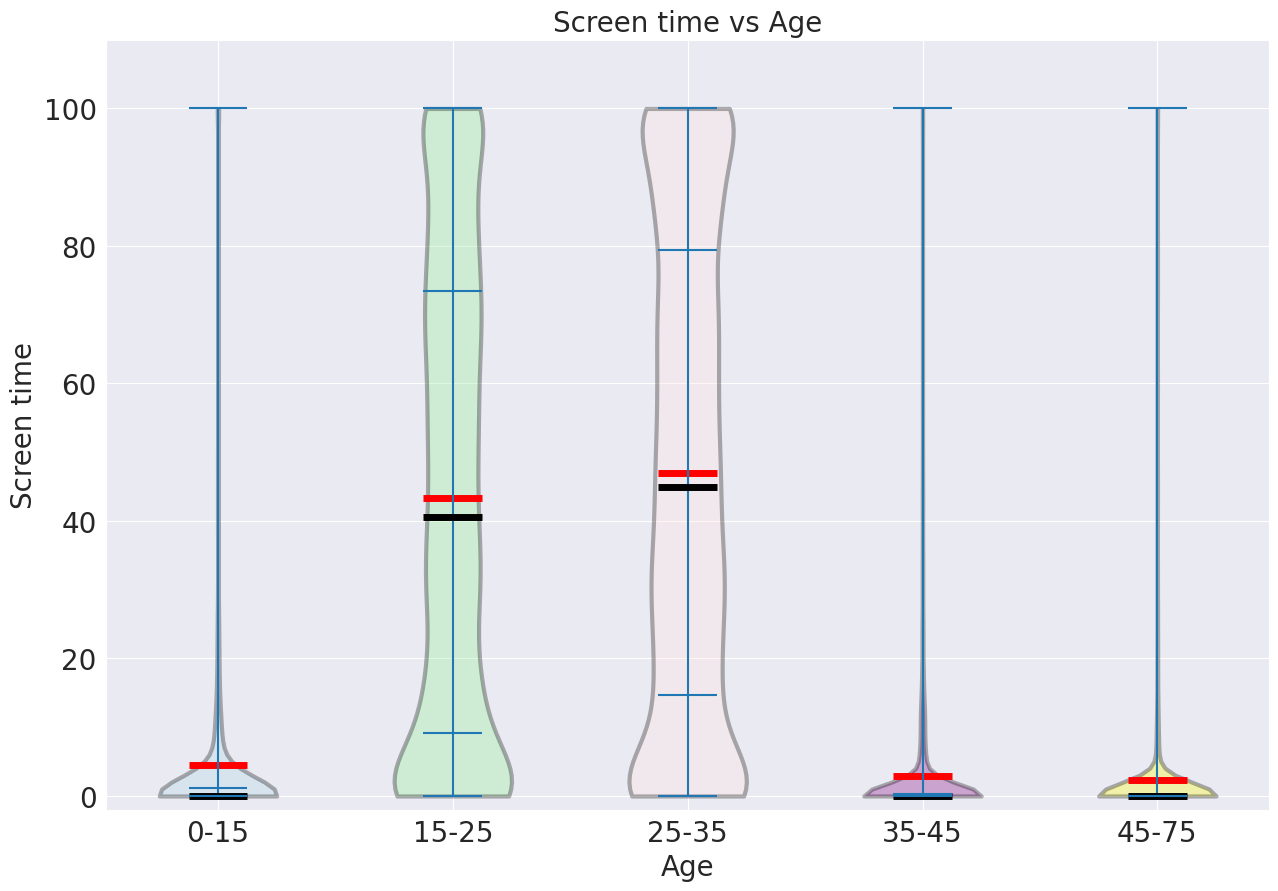

In [73]:
fig, ax = plt.subplots()
age_labels=[dict_age_mapping[k] for k in list(dict_age_mapping.keys())]
median_colors=['black']*len(colors)
mean_colors=['red']*len(colors)
# create a boxplot of the data with custom labels
plots=ax.violinplot(age_screentime_total_list, 
          showmedians=True,showmeans=True,quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75],[0.25,0.75],[0.25,0.75]])
plt.xticks(range(1, len(age_labels) + 1), age_labels)
colors=['lightblue','lightgreen','mistyrose','purple','yellow']

# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('#000000')
    pc.set_linewidth(3)

plots['cmedians'].set_colors(median_colors)
plots['cmedians'].set_linewidth(5)
plots['cmeans'].set_colors(mean_colors)
plots['cmeans'].set_linewidth(5)
# set the title and axis labels
ax.set_title('Screen time vs Age',fontsize=20)
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Screen time', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylim(-2,110)
plt.savefig('plots/violin_plot_age_screentime.png',dpi=300)

In [11]:
# ttest across different age groups 

age_mean_ids=np.argsort(-np.array(mean_age_wise_screentime))
age_keys=list(dict_age_mapping.keys())
sorted_age_screentime=[mean_age_wise_screentime[i] for i in age_mean_ids]
age_keys_sorted=[age_keys[i] for i in age_mean_ids]
pvalues_list=[]
confidence=0.05
for i in range(len(age_keys_sorted)-1):
        
        c_i=rp_data[age_keys_sorted[i]+"_screentime"]
        c_j=rp_data[age_keys_sorted[i+1]+"_screentime"]
        
        t, p = ttest_ind(list(c_i), list(c_j))
        pvalues_list.append(p)
        print(f"t-test between {age_keys_sorted[i]} and {age_keys_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(age_keys_sorted) - 1) < confidence

In [12]:
for j in range(len(age_keys_sorted)-1):
    cat = age_keys_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")


In [13]:
median_age_wise_screentime

[]

In [66]:
#skintone combination 
import re 
skintone_strings=["[-inf, 1.1)",
                      "[1.1, 2.1)","[2.1, 3.1)","[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)","[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"]

mst_skintone_dict={'light': ["[-inf, 1.1)","[1.1, 2.1)","[2.1, 3.1)"],
                   'medium': ["[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)"],
                   'dark': ["[7.1, 8.1)","[8.1, 9.1)","[9.1,10.1)"]
                  }
mst_interval_dict={"[-inf, 1.1)":"light",
                    "[1.1, 2.1)":"light",
                    "[2.1, 3.1)": "light",
                    "[3.1, 4.1)": "medium",
                     "[4.1, 5.1)":"medium",
                     "[5.1, 6.1)": "medium",
                     "[6.1, 7.1)": "medium",
                     "[7.1, 8.1)": "dark",
                     "[8.1, 9.1)":"dark",
                      "[9.1,10.1)":"dark"}

mst_skintone_group_dict={'light':[],'medium':[],'dark':[]}

dict_skintone_screentime=dict()

for string_example in skintone_strings:
    
    col_sample=[col for col in rp_data.columns if string_example in col]
    if(string_example=="[9.1, 10.1)"):
        print(col_sample)
        
    sample_df=rp_data[col_sample]
    curr_sum=sample_df.sum(axis=1)
    rp_data[string_example]=curr_sum

['(female, [15, 25), [9.1, 10.1))', '(female, [25, 35), [9.1, 10.1))', '(male, [15, 25), [9.1, 10.1))', '(male, [25, 35), [9.1, 10.1))']


In [15]:
rp_data["[9.1, 10.1)"].sum()

39

In [67]:
#compute light, medium and dark screentime
rp_data['light']=rp_data['[-inf, 1.1)']+rp_data['[1.1, 2.1)']+rp_data['[2.1, 3.1)']
rp_data['medium']=rp_data['[3.1, 4.1)']+rp_data['[4.1, 5.1)']+rp_data['[5.1, 6.1)']+rp_data['[6.1, 7.1)']
rp_data['dark']=rp_data['[7.1, 8.1)']+rp_data['[8.1, 9.1)']+rp_data['[9.1, 10.1)']

#assert with light, medium and dark 
cols_to_sum=['light','medium','dark']

check_equal=0
#loop over and check the sums with total_faces
for i in np.arange(rp_data.shape[0]):
    if(rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]==rp_data['total_faces'].iloc[i]):
        check_equal=check_equal+1
    else:
        sum_mst_skintone=rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print('Sum mst skintone:%d' %(sum_mst_skintone))
        print('Total faces:%d' %(rp_data['total_faces'].iloc[i]))
        print('Feminine faces:%d' %(rp_data['feminine_faces'].iloc[i]))
        print('Masculine faces:%d' %(rp_data['masculine_faces'].iloc[i]))
        print(rp_data['Filename'].iloc[i])

In [17]:
print(rp_data.shape[0])

7648


In [18]:
check_equal

7648

In [19]:
rp_data['feminine_faces'].iloc[0]

248

In [20]:
rp_data['masculine_faces'].iloc[0]

43

In [21]:
print(rp_data.columns)

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[3.1, 4.1)', '[4.1, 5.1)', '[5.1, 6.1)', '[6.1, 7.1)', '[7.1, 8.1)',
       '[8.1, 9.1)', '[9.1, 10.1)', 'light', 'medium', 'dark'],
      dtype='object', length=170)


72.72727272727273
99.35894801725908
100.0
0.0
0.0
14.150943396226415
0.0
0.0
0.41841004184100417
[99.35894801725908, 0.0, 0.0]
[81.39517346708536, 12.010329121603872, 6.594497411310771]


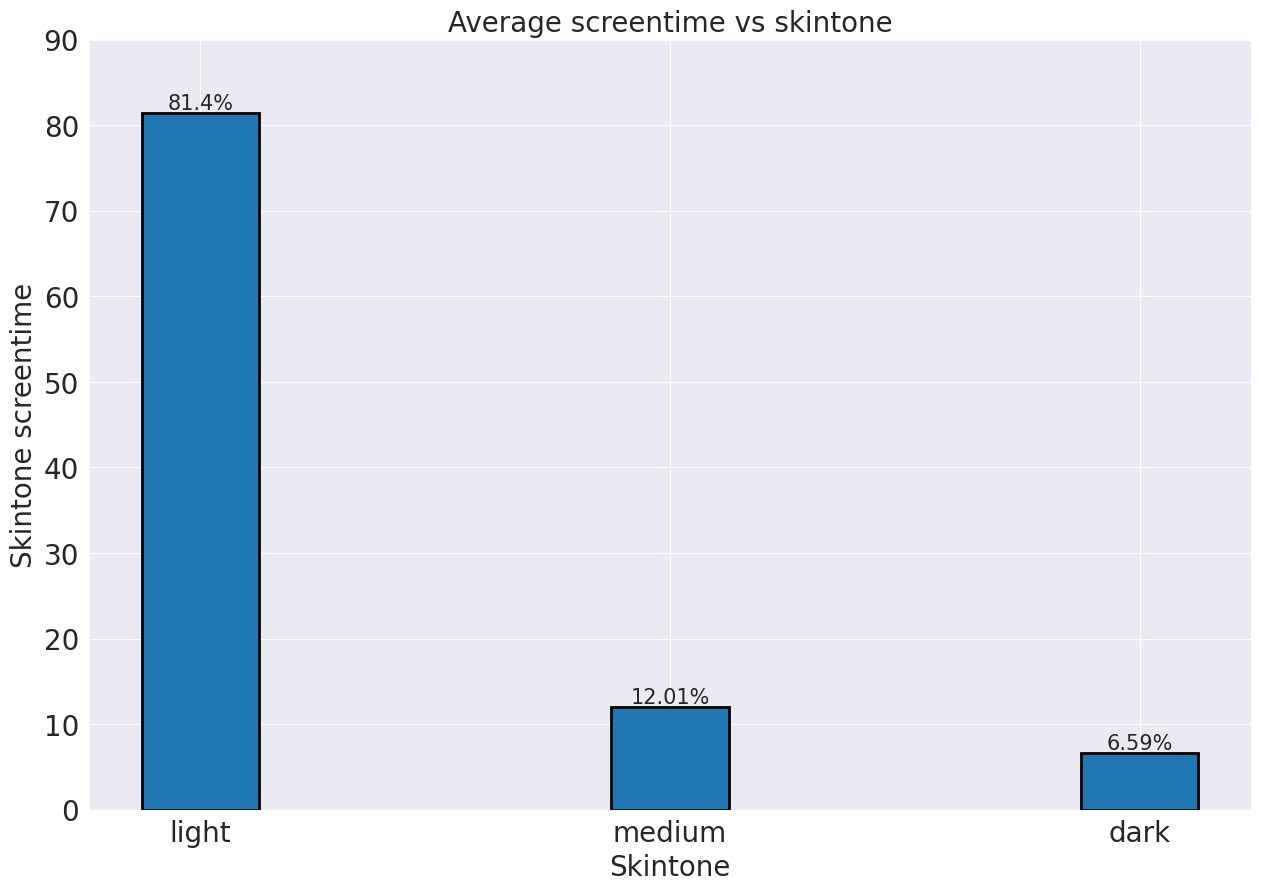

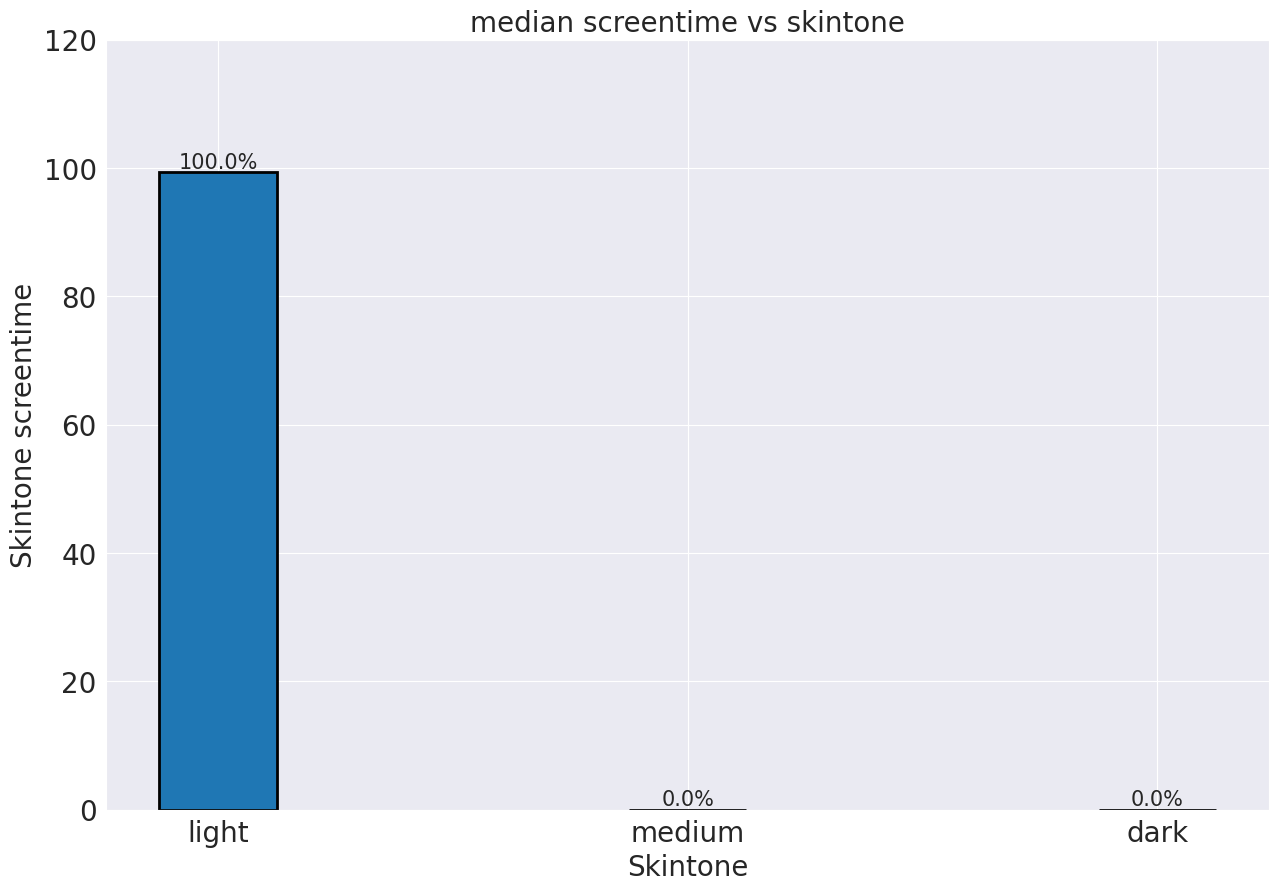

In [68]:
#plot the skintone unconditional distribution
from collections import Counter
def plot_skintone_screentime(data,keys,metric="median"):
    
    fig, ax = plt.subplots()
    # create a bar plot of the dictionary
    ax.bar(keys,data,edgecolor='black',linewidth=2, width=0.25)
    
    for i, v in enumerate(data):
        ax.annotate(str(round((v/sum(data))*100, 2)) + "%", xy=(i, v), ha='center', va='bottom', fontsize=15)

    # set the title and axis labels
    title=metric+" screentime vs skintone"
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Skintone', fontsize=20)
    ax.set_ylabel('Skintone screentime', fontsize=20)

    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    #plt.show()
    #save the plots
    filename=metric+"_skintone_screentime.png"
    plt.savefig('plots/'+filename,dpi=300)


rp_data['light_screentime']=rp_data['light']/rp_data['total_faces']
rp_data['medium_screentime']=rp_data['medium']/rp_data['total_faces']
rp_data['dark_screentime']=rp_data['dark']/rp_data['total_faces']

print(np.percentile(rp_data['light_screentime'],25)*100)
print(np.percentile(rp_data['light_screentime'],50)*100)
print(np.percentile(rp_data['light_screentime'],75)*100)

print(np.percentile(rp_data['medium_screentime'],25)*100)
print(np.percentile(rp_data['medium_screentime'],50)*100)
print(np.percentile(rp_data['medium_screentime'],75)*100)

print(np.percentile(rp_data['dark_screentime'],25)*100)
print(np.percentile(rp_data['dark_screentime'],50)*100)
print(np.percentile(rp_data['dark_screentime'],75)*100)

# print(Counter(list(rp_data['light_screentime'])).most_common(5))
# print(Counter(list(rp_data['medium_screentime'])).most_common(5))
# print(Counter(list(rp_data['dark_screentime'])).most_common(5))

#mean and median values of screentime
light_screentime_mean=rp_data['light_screentime'].mean()*100
medium_screentime_mean=rp_data['medium_screentime'].mean()*100
dark_screentime_mean=rp_data['dark_screentime'].mean()*100

light_screentime_median=rp_data['light_screentime'].median()*100
medium_screentime_median=rp_data['medium_screentime'].median()*100
dark_screentime_median=rp_data['dark_screentime'].median()*100

keys=['light','medium','dark']

#mean and median data 
mean_data=[light_screentime_mean,medium_screentime_mean,dark_screentime_mean]
median_data=[light_screentime_median,medium_screentime_median,dark_screentime_median]
print(median_data)
print(mean_data)
plot_skintone_screentime(mean_data,keys,metric="Average")
plot_skintone_screentime(median_data,keys,metric="median")

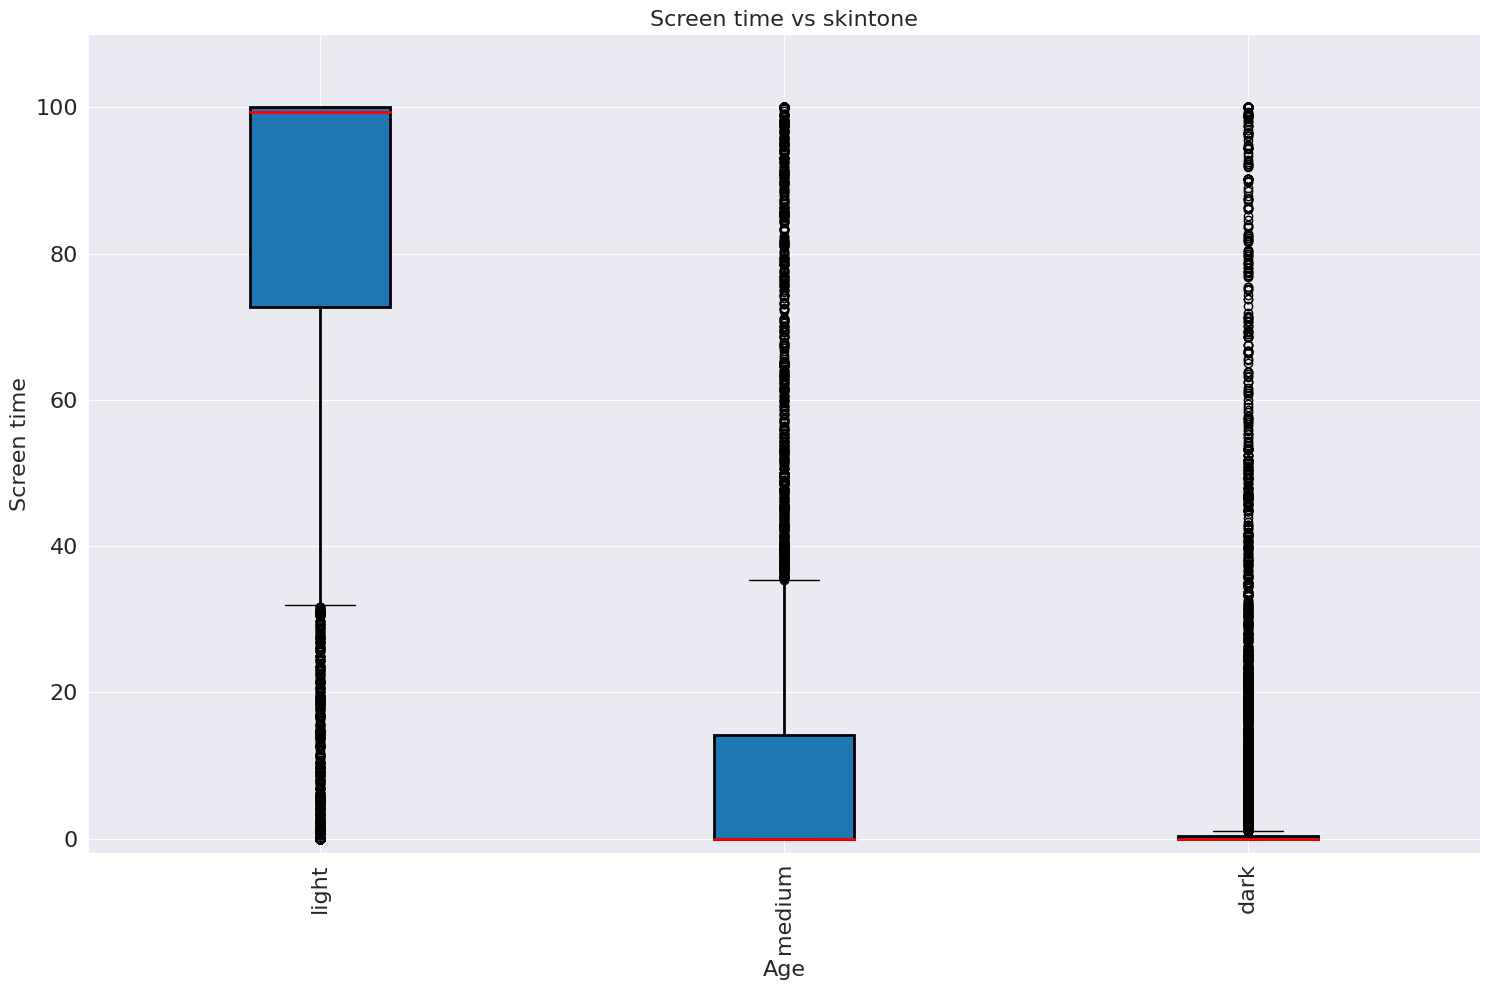

In [71]:
# create a boxplot of the data with custom labels
fig, ax = plt.subplots()
skintone_screentime_list=[[x*100 for x in list(rp_data['light_screentime'])],
                          [x*100 for x in list(rp_data['medium_screentime'])],
                          [x*100 for x in list(rp_data['dark_screentime'])]]

ax.boxplot(skintone_screentime_list, labels=['light','medium','dark'], 
          patch_artist=True, 
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Screen time vs skintone',fontsize=16)
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('Screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-2,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('plots/box_plot_skintone_screentime.png',dpi=300)

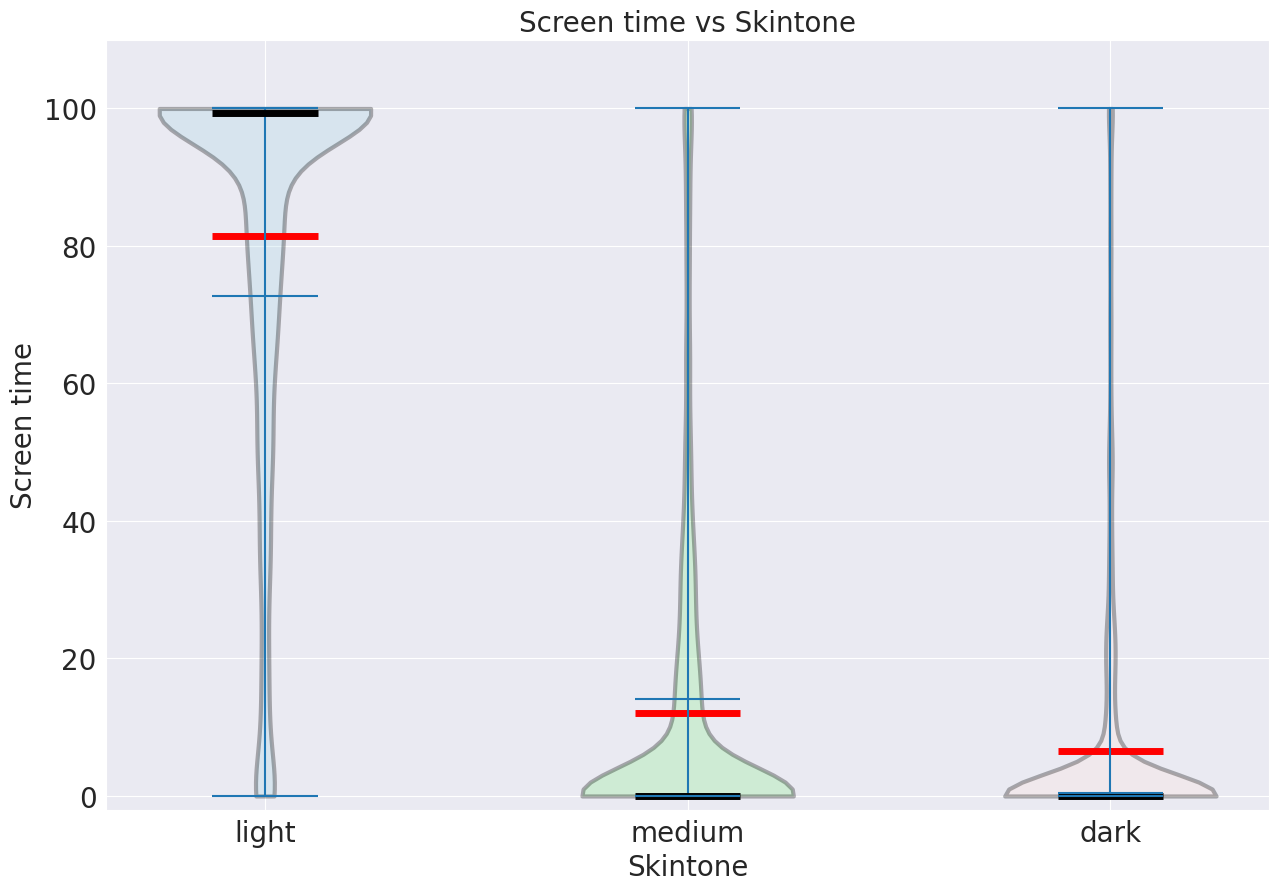

In [78]:
fig, ax = plt.subplots()
labels=['light','medium','dark']
# create a boxplot of the data with custom labels
colors=['lightblue','lightgreen','mistyrose']

plots=ax.violinplot(skintone_screentime_list, 
          showmedians=True,showmeans=True,quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75]])
plt.xticks(range(1, len(labels) + 1), labels, fontsize=16)

median_colors=['black']*len(colors)
mean_colors=['red']*len(colors)

# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('#000000')
    pc.set_linewidth(3)

plots['cmedians'].set_colors(median_colors)
plots['cmedians'].set_linewidth(5)
plots['cmeans'].set_colors(mean_colors)
plots['cmeans'].set_linewidth(5)

# set the title and axis labels
ax.set_title('Screen time vs Skintone',fontsize=20)
ax.set_xlabel('Skintone',fontsize=20)
ax.set_ylabel('Screen time', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylim(-2,110)
plt.savefig('plots/violin_plot_skintone_screentime.png',dpi=300)

In [25]:
#save the rp data in current format
rp_data.to_csv('RP_data_screentime_metrics_filtered_data.csv',index=False)

In [26]:
#### per gender age distribution ####
## per gender bins plot the distribution across age groups
## distribution:
### 1. male x {(0-15), (15-25), (25-35), (35-45), (45-75)}
### 2. female x {(0-15), (15-25), (25-35), (35-45), (45-75)}

#extract male data

from statistics import mean
male_cols=[col for col in rp_data.columns if 'male' in col and 'female' not in col]
print(male_cols)
male_data=rp_data[male_cols]
male_data['masculine_faces']=rp_data['masculine_faces']

age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)', '[45, 55)','[55, 65)', '[65, 75)']
condensed_age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)','[45, 75)']

for age in age_bins:
    
    age_col=[col for col in male_data.columns if age in col]
    age_data=male_data[age_col]
    male_data[age]=age_data.sum(axis=1)
    
male_data['[45, 75)']=male_data['[45, 55)']+male_data['[55, 65)']+male_data['[65, 75)']

#### per age gender distribution ####
### 1. (0-15) x {female}, (15-25) x {female}
female_cols=[col for col in rp_data.columns if 'female' in col]
female_data=rp_data[female_cols]
female_data['feminine_faces']=rp_data['feminine_faces']

for age in age_bins:
    
    age_col=[col for col in female_data.columns if age in col]
    age_fem_data=female_data[age_col]
    female_data[age]=age_fem_data.sum(axis=1)
    

female_data['[45, 75)']=female_data['[45, 55)']+female_data['[55, 65)']+female_data['[65, 75)']


# #organize data as follows:
# #index=[male,female]
# #male =[mean(0,15), mean(15,25), mean(25,35), mean(35,45), mean(45,75)]

# #compute means 
# male_data_mean=[]
# for age_bin in condensed_age_bins:
#     screen_df_male=male_data[age_bin]/male_data['masculine_faces']
#     male_data_mean.append(np.nanmean(list((screen_df_male))))
    
# female_data_mean=[]
# for age_bin in condensed_age_bins:
#     screen_df_female=female_data[age_bin]/female_data['feminine_faces']
#     female_data_mean.append((np.nanmean(list(screen_df_female))))
    

['(male, [0, 15), [-inf, 1.1))', '(male, [0, 15), [1.1, 2.1))', '(male, [0, 15), [2.1, 3.1))', '(male, [0, 15), [3.1, 4.1))', '(male, [0, 15), [4.1, 5.1))', '(male, [0, 15), [5.1, 6.1))', '(male, [0, 15), [6.1, 7.1))', '(male, [0, 15), [7.1, 8.1))', '(male, [0, 15), [8.1, 9.1))', '(male, [15, 25), [-inf, 1.1))', '(male, [15, 25), [1.1, 2.1))', '(male, [15, 25), [2.1, 3.1))', '(male, [15, 25), [3.1, 4.1))', '(male, [15, 25), [4.1, 5.1))', '(male, [15, 25), [5.1, 6.1))', '(male, [15, 25), [6.1, 7.1))', '(male, [15, 25), [7.1, 8.1))', '(male, [15, 25), [8.1, 9.1))', '(male, [15, 25), [9.1, 10.1))', '(male, [25, 35), [-inf, 1.1))', '(male, [25, 35), [1.1, 2.1))', '(male, [25, 35), [2.1, 3.1))', '(male, [25, 35), [3.1, 4.1))', '(male, [25, 35), [4.1, 5.1))', '(male, [25, 35), [5.1, 6.1))', '(male, [25, 35), [6.1, 7.1))', '(male, [25, 35), [7.1, 8.1))', '(male, [25, 35), [8.1, 9.1))', '(male, [25, 35), [9.1, 10.1))', '(male, [35, 45), [-inf, 1.1))', '(male, [35, 45), [1.1, 2.1))', '(male, [3

/tmp/ipykernel_55496/2488110775.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['masculine_faces']=rp_data['masculine_faces']
/tmp/ipykernel_55496/2488110775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data[age]=age_data.sum(axis=1)
/tmp/ipykernel_55496/2488110775.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [27]:
sum_age_val=0
male_data_mean=[]
for age_bin in condensed_age_bins:
    #sum_age_val=sum_age_val+male_data[age_bin].sum()
    percent_val=(male_data[age_bin].sum())/(male_data['masculine_faces'].sum())
    male_data_mean.append(percent_val*100)

In [28]:
sum_age_val=0
female_data_mean=[]
for age_bin in condensed_age_bins:
    percent_val=(female_data[age_bin].sum())/(female_data['feminine_faces'].sum())
    female_data_mean.append(percent_val*100)

In [29]:
#plotting the male vs female grouped bar plot 
plt.rcParams["figure.figsize"] = (15,10)
sns.set_style('darkgrid')
index=['male','female']
dict_age_sample={}

for i,v in enumerate(condensed_age_bins):
    dict_age_sample[v]=[male_data_mean[i],female_data_mean[i]]
    
# # create the bars for group 1
# fig, ax = plt.subplots()

# bar_width=0.35
# bars1 = ax.bar(np.arange(len(male_data_mean)), male_data_mean, linewidth=2, edgecolor='black', width=bar_width, label='Male')

# group_width=10
# # create the bars for group 2
# bars2 = ax.bar(np.arange(len(female_data_mean)) + group_width, female_data_mean, linewidth=2, edgecolor='black', width=bar_width, label='Female')


# ax.set_xticks(np.arange(len(condensed_age_bins)))
# ax.set_xticklabels(condensed_age_bins)

# ax.set_xticks(np.arange(len(condensed_age_bins))+group_width)
# ax.set_xticklabels(condensed_age_bins)

# ax.legend()
# plt.show()
# filename="Age_based_screentime_vs_gender.png"
# plt.savefig('plots/'+filename,dpi=300)

In [30]:
dict_age_sample

{'[0, 15)': [2.9498614122231674, 2.673418818901713],
 '[15, 25)': [24.054996020747, 38.185216215516796],
 '[25, 35)': [58.122890309832876, 50.238244656073704],
 '[35, 45)': [9.708828453031092, 4.407607007918845],
 '[45, 75)': [5.163423804165866, 4.495513301588945]}

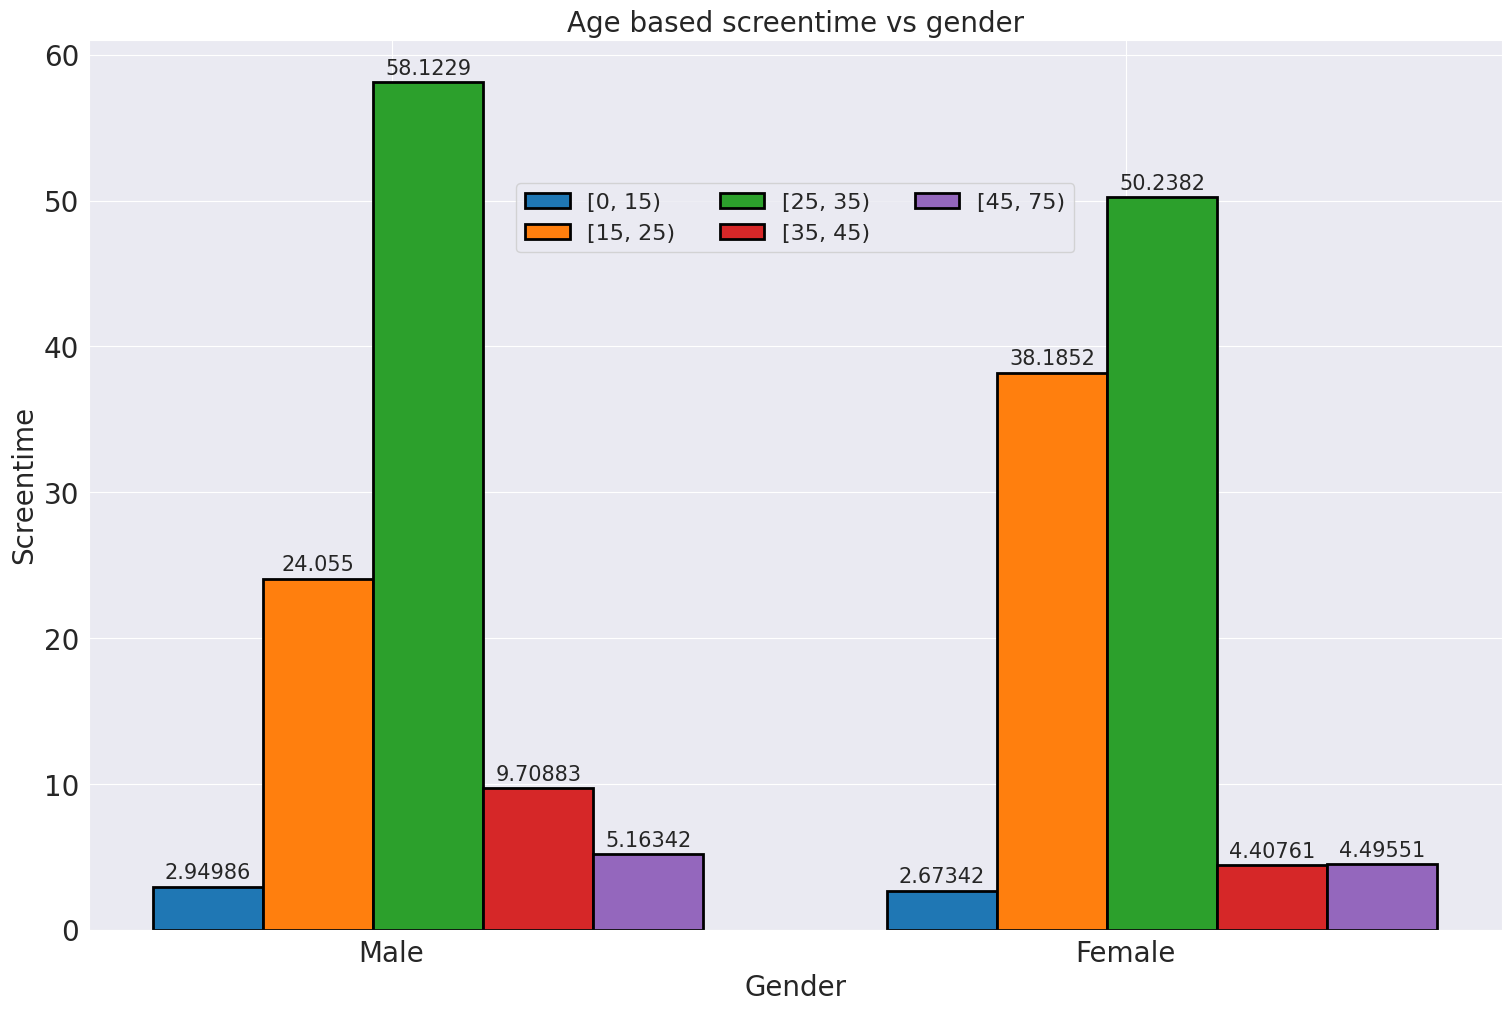

In [31]:
gender=('Male', 'Female')
x = np.arange(len(gender))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dict_age_sample.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Screentime',fontsize=20)
ax.set_title('Age based screentime vs gender', fontsize=20)
ax.set_xticks(x + 0.25, gender)

ax.legend(loc='center', bbox_to_anchor=(0.5, 0.8), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
    
filename="Age_based_screentime_vs_gender.png"
plt.savefig('plots/'+filename,dpi=300)

In [32]:
male_data.head(5)

,"(male, [0, 15), [-inf, 1.1))","(male, [0, 15), [1.1, 2.1))","(male, [0, 15), [2.1, 3.1))","(male, [0, 15), [3.1, 4.1))","(male, [0, 15), [4.1, 5.1))","(male, [0, 15), [5.1, 6.1))","(male, [0, 15), [6.1, 7.1))","(male, [0, 15), [7.1, 8.1))","(male, [0, 15), [8.1, 9.1))","(male, [15, 25), [-inf, 1.1))",...,male_screentime,masculine_faces,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 55)","[55, 65)","[65, 75)","[45, 75)"
0,0,0,0,0,0,0,0,0,0,0,...,0.147766,43,0,3,15,15,10,0,0,10
1,0,2,0,0,0,0,0,0,0,2,...,0.911980,373,2,16,353,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.995327,213,0,8,205,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.090323,42,0,7,35,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.015385,7,0,7,0,0,0,0,0,0


In [33]:
male_data[male_data['masculine_faces']==0]
male_data.shape

(7648, 63)

In [34]:
for skintone in skintone_strings:
    
    sk_male_col=[col for col in male_data.columns if skintone in col]
    sk_male_data=male_data[sk_male_col]
    male_data[skintone]=sk_male_data.sum(axis=1)
    
    sk_female_col=[col for col in female_data.columns if skintone in col]
    sk_female_data=female_data[sk_female_col]
    female_data[skintone]=sk_female_data.sum(axis=1)

/tmp/ipykernel_55496/425238658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data[skintone]=sk_male_data.sum(axis=1)
/tmp/ipykernel_55496/425238658.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data[skintone]=sk_female_data.sum(axis=1)
/tmp/ipykernel_55496/425238658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [35]:
# compute the light, medium, dark skintone for male and female genders 

male_data['light']=male_data['[-inf, 1.1)']+male_data['[1.1, 2.1)']+male_data['[2.1, 3.1)']
male_data['medium']=male_data['[3.1, 4.1)']+male_data['[4.1, 5.1)']+male_data['[5.1, 6.1)']+male_data['[6.1, 7.1)']
male_data['dark']=male_data['[7.1, 8.1)']+male_data['[8.1, 9.1)']+male_data['[9.1, 10.1)']

female_data['light']=female_data['[-inf, 1.1)']+female_data['[1.1, 2.1)']+female_data['[2.1, 3.1)']
female_data['medium']=female_data['[3.1, 4.1)']+female_data['[4.1, 5.1)']+female_data['[5.1, 6.1)']+female_data['[6.1, 7.1)']
female_data['dark']=female_data['[7.1, 8.1)']+female_data['[8.1, 9.1)']+female_data['[9.1, 10.1)']



/tmp/ipykernel_55496/252442288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['light']=male_data['[-inf, 1.1)']+male_data['[1.1, 2.1)']+male_data['[2.1, 3.1)']
/tmp/ipykernel_55496/252442288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['medium']=male_data['[3.1, 4.1)']+male_data['[4.1, 5.1)']+male_data['[5.1, 6.1)']+male_data['[6.1, 7.1)']
/tmp/ipykernel_55496/252442288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [36]:
#skintone screentime

#compute means 

skintone_bins=['light','medium','dark']
male_data_skintone_mean=[]
female_data_skintone_mean=[]
for sk_bin in skintone_bins:
    
    male_sk_mean=((male_data[sk_bin]).sum())/(male_data['masculine_faces'].sum())
    male_data_skintone_mean.append(male_sk_mean*100)
    
    female_sk_mean=((female_data[sk_bin]).sum())/(female_data['feminine_faces'].sum())
    female_data_skintone_mean.append(female_sk_mean*100)
    

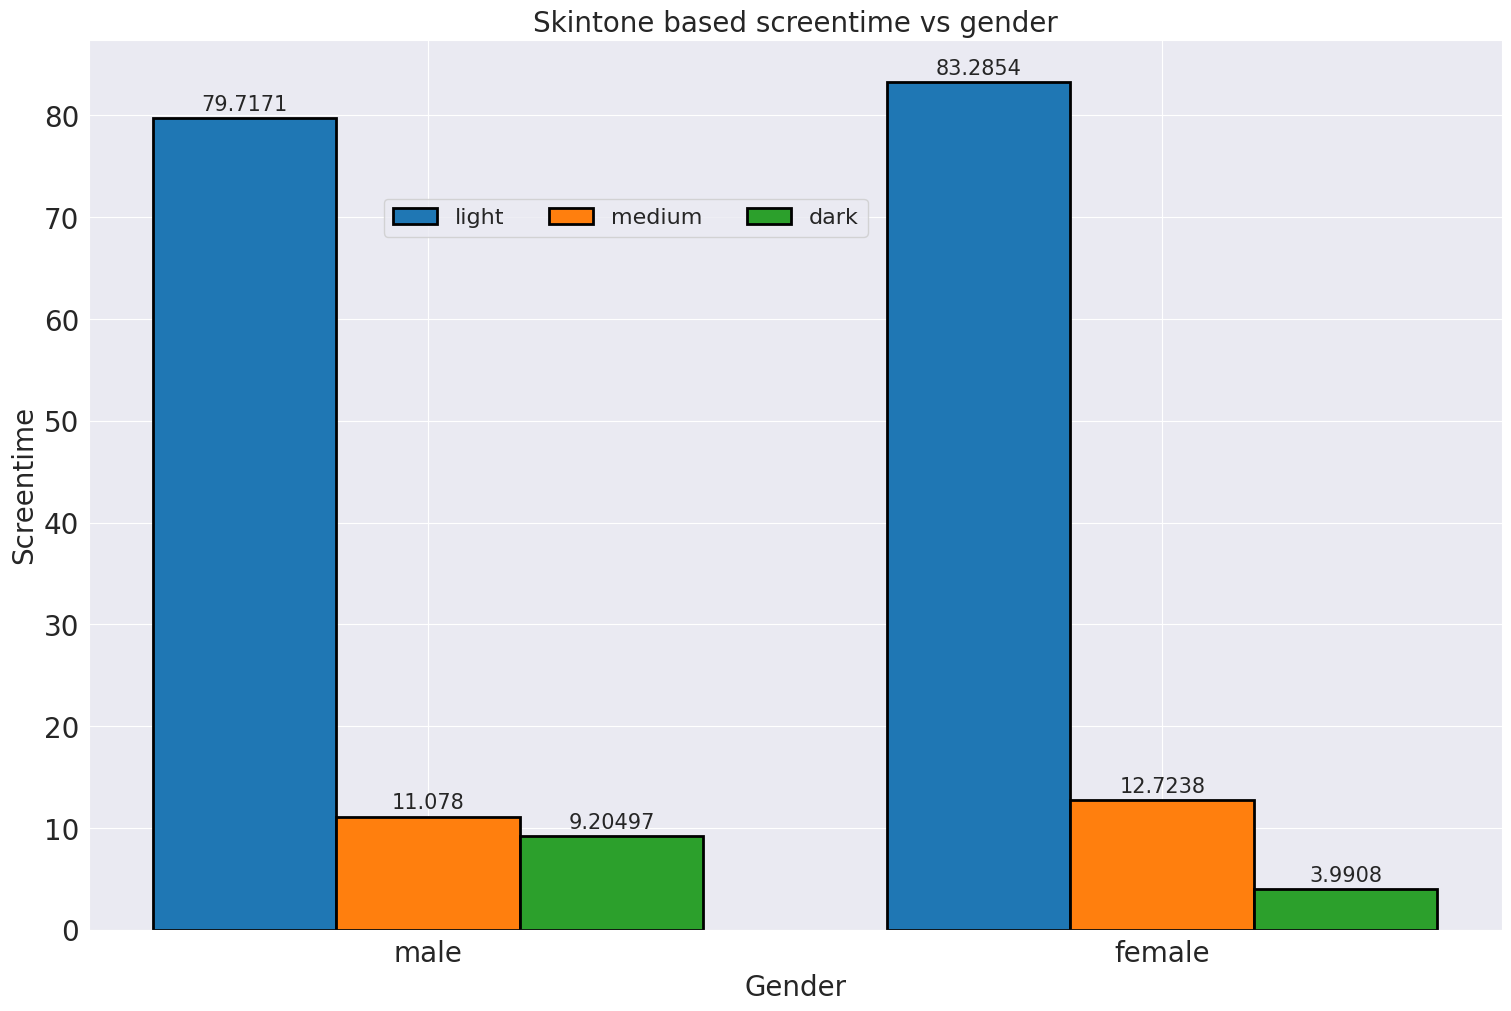

In [37]:
#plot by creating the dictionary
plt.rcParams["figure.figsize"] = (15,10)
sns.set_style('darkgrid')
index=['male','female']
x = np.arange(len(index)) 
dict_sk_sample={}
width=0.25
multiplier=0

for i,v in enumerate(skintone_bins):
    dict_sk_sample[v]=[male_data_skintone_mean[i],female_data_skintone_mean[i]]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dict_sk_sample.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Screentime',fontsize=20)
ax.set_title('Skintone based screentime vs gender', fontsize=20)
ax.set_xticks(x + width, index)
ax.legend(loc='center', bbox_to_anchor=(0.38, 0.8), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
    
filename="Skintone_based_screentime_vs_gender.png"
plt.savefig('plots/'+filename,dpi=300)

In [38]:
dict_sk_sample

{'light': [79.71706139026867, 83.28543100771182],
 'medium': [11.077965915639837, 12.723768826665285],
 'dark': [9.204972694091495, 3.9908001656228973]}